In [40]:
import sympy as sp

In [41]:
t = sp.symbols('t', positive=True)
s = sp.symbols('s')
a = sp.symbols('a', real=True, positive=True)

In [42]:
f = -1/3 * sp.exp(-1 * t) + 1/3 * sp.exp(2 * t)
f

0.333333333333333*exp(2*t) - 0.333333333333333*exp(-t)

In [43]:
F = sp.laplace_transform(f, t, s, noconds = True)
F

1.0/((s - 2)*(s + 1))

In [44]:
G = - (2 * s *((- s ** 2) + 3)/((s ** 2) + 1) ** 3)
G

-2*s*(3 - s**2)/(s**2 + 1)**3

In [45]:
g = sp.inverse_laplace_transform(G, s, t)
g

t*(t*cos(t) - sin(t))

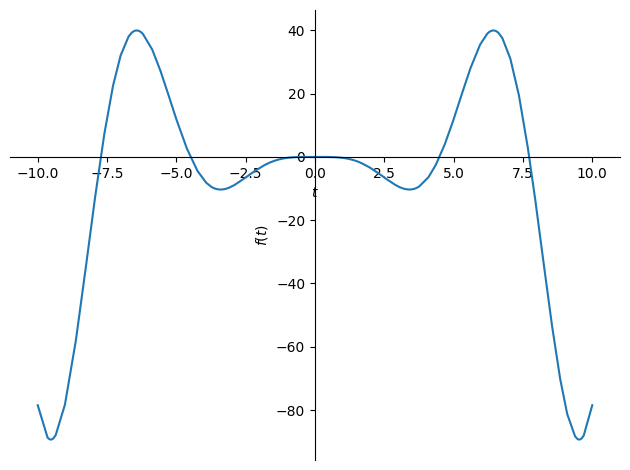

In [46]:
sp.plot(g)

In [47]:
import numpy as np

In [48]:
def gauss_laplace_inverse(f, T, N):
    """
    Calcula la transformada inversa de Laplace de una función F(s) utilizando el método de cuadratura de Gauss.

    Parámetros:
    F (función): la función de Laplace F(s).
    T (float): el valor de t en el que se quiere evaluar la función inversa de Laplace.
    N (int): el número de puntos de la cuadratura de Gauss a utilizar.

    Retorna:
    El valor de la función inversa de Laplace evaluada en t.
    """

    # Definimos la función a integrar
    def integrand(u):
        return f(u) * np.exp(u*T)

    # Calculamos los puntos y pesos de la cuadratura de Gauss
    x, w = np.polynomial.legendre.leggauss(N)

    # Convertimos los puntos de la cuadratura de Gauss a nuestro intervalo de integración
    a = -1
    b = 1
    t = 0.5*(b-a)*x + 0.5*(b+a)

    # Evaluamos la función en los puntos de la cuadratura de Gauss y multiplicamos por los pesos correspondientes
    integrand_values = integrand(t)
    integral_value = np.dot(w, integrand_values)

    # Dividimos por pi para obtener la función inversa de Laplace
    result = integral_value / np.pi

    return result

In [49]:
def f(s):
    return 1 / np.sqrt(s**2 + 1)

result = gauss_laplace_inverse(f, 8, 12)

In [50]:
result

89.3093534275522

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def inverse_laplace(F, x0, y0, h, N):
   
    # Definición del arreglo de puntos
    x = np.zeros(N+1)
    y = np.zeros(N+1, dtype=np.complex128)
    x[0] = x0
    y[0] = y0
    
    # Cálculo de los puntos usando el método de Euler
    for n in range(N):
        y[n+1] = y[n] + h * (F(x[n]) + F(x[n+1])) / 2
        print(F(x[n]) + F(x[n+1]))
        x[n+1] = x[n] + h
    
    # Imprimir los puntos
    print("Puntos calculados:")
    for n in range(N+1):
        print(f"x_{n} = {x[n]:.4f}   y_{n} = {y[n].real:.4f} + {y[n].imag:.4f}j")
    
    # Graficar la función resultante
    plt.plot(x, y.real)
    plt.plot(x, y.imag)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Parte real', 'Parte imaginaria'])
    plt.show()

1.0
0.5192307692307693
0.504950495049505
0.5022123893805309
0.5012468827930174
0.5007987220447284
0.5005549389567148
0.5004078303425775
0.5003123048094941
0.5002467917077986
0.5001999200319872
0.5001652346331791
0.5001388503193558
0.5001183151916706
0.5001020199959192
0.5000888730892286
0.5000781127948758
0.5000691945751453
0.5000617207752129
0.5000553955240417
Puntos calculados:
x_0 = 0.0000   y_0 = 0.0000 + 0.0000j
x_1 = 10.0000   y_1 = 5.0000 + 0.0000j
x_2 = 20.0000   y_2 = 7.5962 + 0.0000j
x_3 = 30.0000   y_3 = 10.1209 + 0.0000j
x_4 = 40.0000   y_4 = 12.6320 + 0.0000j
x_5 = 50.0000   y_5 = 15.1382 + 0.0000j
x_6 = 60.0000   y_6 = 17.6422 + 0.0000j
x_7 = 70.0000   y_7 = 20.1450 + 0.0000j
x_8 = 80.0000   y_8 = 22.6470 + 0.0000j
x_9 = 90.0000   y_9 = 25.1486 + 0.0000j
x_10 = 100.0000   y_10 = 27.6498 + 0.0000j
x_11 = 110.0000   y_11 = 30.1508 + 0.0000j
x_12 = 120.0000   y_12 = 32.6516 + 0.0000j
x_13 = 130.0000   y_13 = 35.1523 + 0.0000j
x_14 = 140.0000   y_14 = 37.6529 + 0.0000j
x_15 =

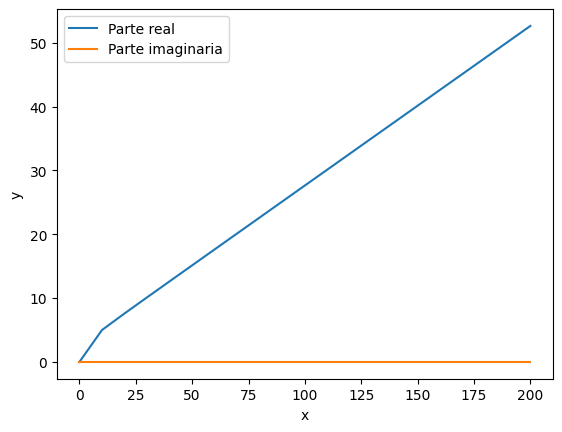

In [53]:
F_str = '2/(s**2 + 4)'
F = lambda s: eval(F_str)  # Definir la función de la transformada de Laplace

# Ingreso de los parámetros
x0 = 0
y0 = 0
h = 10
N = 20

inverse_laplace(F, x0, y0, h, N)

Para resolver el ejemplo matemáticamente, primero debemos aplicar la definición de la transformada de Laplace:

$$F(s) = \mathcal{L}{f(t)} = \int_0^\infty e^{-st} f(t) dt$$

En este caso, tenemos $f(t) = \frac{1}{t}$, por lo que la transformada de Laplace es:

$$F(s) = \int_0^\infty e^{-st} \frac{1}{t} dt$$

Esta integral no tiene una solución cerrada, por lo que se debe utilizar algún método numérico para aproximar su valor. En este caso, utilizaremos el método de cuadratura de Gauss.

Para aplicar el método de cuadratura de Gauss, primero debemos transformar la integral a una forma en la que se pueda aplicar la cuadratura. Para hacer esto, se realiza un cambio de variable:

$$u = st \Rightarrow du = s dt$$

Sustituyendo en la integral, tenemos:

$$F(s) = \int_0^\infty e^{-u} \frac{1}{s} \frac{du}{s} = \frac{1}{s} \int_0^\infty e^{-u} u^{-1} du$$

hora podemos aplicar la cuadratura de Gauss a la integral $\int_0^\infty e^{-u} u^{-1} du$. Primero, debemos elegir los nodos y los pesos de la cuadratura. Para $N$ nodos, los nodos $u_i$ y los pesos $w_i$ se definen como:

$$u_i = \frac{1}{2}(\alpha_i + \beta_i) + \frac{1}{2}(\beta_i - \alpha_i) x_i$$

$$w_i = \frac{1}{2}(\beta_i - \alpha_i) A_i$$

donde $\alpha_i$ y $\beta_i$ son los límites de integración, $x_i$ y $A_i$ son los nodos y pesos de la cuadratura de Gauss-Legendre con $N$ nodos en el intervalo $[-1,1]$.

En este caso, los límites de integración son $0$ y $\infty$, por lo que debemos hacer un cambio de variable para integrar en el intervalo finito $[0,1]$. Para hacer esto, utilizamos el cambio de variable $u = \frac{t}{1-t}$, por lo que $du = \frac{1}{(1-t)^2} dt$. Sustituyendo en la integral, tenemos:

$$\int_0^\infty e^{-u} u^{-1} du = \int_0^1 e^{-\frac{t}{1-t}} \left(\frac{t}{1-t}\right)^{-1} \frac{1}{(1-t)^2} dt = \int_0^1 \frac{e^{-t}}{t} dt$$

Por lo tanto, la transformada de Laplace es:

$$F(s) = \frac{1}{s} \int_0^1 \frac{e^{-t}}{t} dt$$